In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler as stdscl
import matplotlib.pyplot as plt
from google.colab import drive
import datetime
import seaborn as sns
from collections import Counter
import math
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Assingment/Linear regression'
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

Mounted at /content/drive


In [3]:
price = train['price']
distance = train['distance']
price_per_km = price / distance
#print(price_per_km)
trainn = train
trainn['price_per_km'] = price_per_km
trainn.head()

,Unnamed: 0,id,timestamp,hour,day,month,datetime,timezone,source,destination,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_per_km
0,0,6e3137fd-68d9-4a11-8a79-c051ea3939ed,1.543457e+09,2,29,11,2018-11-29 02:05:07,America/New_York,North Station,South Station,...,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800,8.294931
1,1,8311e306-6577-44a9-9836-2293d974e735,1.543334e+09,15,27,11,2018-11-27 15:51:23,America/New_York,Back Bay,Haymarket Square,...,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000,10.317460
2,2,2cae1063-3be2-4f8b-b9ae-486b00d23315,1.544768e+09,6,14,12,2018-12-14 06:15:08,America/New_York,Financial District,North End,...,1544806800,27.27,1544781600,46.51,1544814000,24.61,1544785200,43.74,1544817600,13.200000
3,3,8501329c-4de6-4e61-8714-8f7635db4b7c,1.543272e+09,22,26,11,2018-11-26 22:42:24,America/New_York,Fenway,North Station,...,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600,6.055901
4,4,b65678c5-2b3a-4f05-b8d3-9a755a893230,1.543417e+09,14,28,11,2018-11-28 14:51:25,America/New_York,Haymarket Square,Financial District,...,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800,7.070707


In [4]:
K=train.corr()['price']
K_sort = K.sort_values(ascending=False)
#print(K_sort)
K_sort.head(60)

<ipython-input-4-64998cde421f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  K=train.corr()['price']


price                          1.000000
distance                       0.343920
surge_multiplier               0.238948
price_per_km                   0.233138
latitude                       0.002099
windSpeed                      0.001775
windGust                       0.001741
precipIntensityMax             0.001293
hour                           0.001224
cloudCover                     0.001168
Unnamed: 0                     0.001069
uvIndex                        0.001051
apparentTemperatureLow         0.000939
precipIntensity                0.000828
visibility.1                   0.000726
visibility                     0.000726
temperature                    0.000476
precipProbability              0.000412
pressure                       0.000396
ozone                          0.000177
month                          0.000106
apparentTemperature            0.000054
temperatureLow                -0.000028
windBearing                   -0.000122
windGustTime                  -0.000192


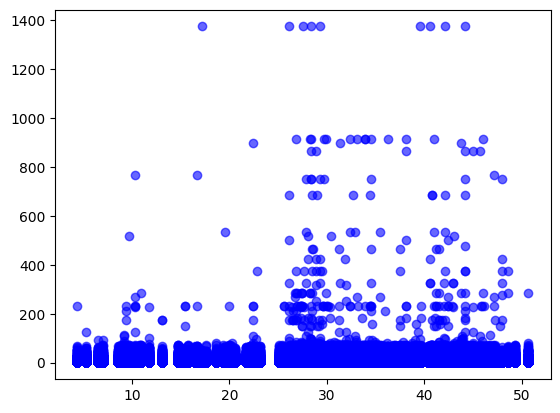

In [5]:
y_train = trainn['price_per_km']
X_train =  trainn['distance']
X_train1 =  trainn['dewPoint']
 #([math.exp(2 - price_per_km) for price_per_km in trainn['distance']])*trainn['price_per_km']
#sns.pairplot(train, x_vars=X_train, y_vars=y_train,height=7, aspect=0.7, kind='scatter')
#plt.scatter(X_train, y_train,color='blue', alpha=0.6)
plt.scatter(X_train1, y_train,color='blue', alpha=0.6)

In [6]:

def discrete(source):
    A = []
    c = 0
    B = dict()
    D = []
    G = str(source)
    sources = train[G]

    for source in sources:
        if source not in A:
            A.append(source)
            c = c + 1
            B[source] = c
        D.append(B[source])


    return A


In [7]:
short_summary = discrete('short_summary')
print(short_summary)
Count = train['short_summary']

[' Mostly Cloudy ', ' Overcast ', ' Possible Drizzle ', ' Partly Cloudy ', ' Light Rain ', ' Rain ', ' Clear ', ' Drizzle ', ' Foggy ']


In [8]:
counts = Counter(Count)

#Print the counts
for item, count in counts.items():
    print(f"{item}: {count}")


 Mostly Cloudy : 94332
 Overcast : 141199
 Possible Drizzle : 11968
 Partly Cloudy : 82186
 Light Rain : 35294
 Rain : 15087
 Clear : 56046
 Drizzle : 4687
 Foggy : 5784


In [ ]:
X_axis = train['short_summary']
Y_axis = train['price']
plt.bar(X_axis, Y_axis)

In [ ]:


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446583 entries, 0 to 446582
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   446583 non-null  int64  
 1   id                           446583 non-null  object 
 2   timestamp                    446583 non-null  float64
 3   hour                         446583 non-null  int64  
 4   day                          446583 non-null  int64  
 5   month                        446583 non-null  int64  
 6   datetime                     446583 non-null  object 
 7   timezone                     446583 non-null  object 
 8   source                       446583 non-null  object 
 9   destination                  446583 non-null  object 
 10  cab_type                     446583 non-null  object 
 11  product_id                   446583 non-null  object 
 12  name                         446583 non-null  object 
 13 

In [ ]:
train.describe()

,Unnamed: 0,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_per_km
count,446583.00000,4.465830e+05,446583.000000,446583.000000,446583.000000,446583.000000,446583.000000,446583.000000,446583.000000,446583.000000,...,4.465830e+05,446583.000000,4.465830e+05,446583.000000,4.465830e+05,446583.000000,4.465830e+05,446583.000000,4.465830e+05,446583.000000
mean,223291.00000,1.544047e+09,11.611313,17.794618,11.587004,16.538906,2.188560,1.014986,42.338155,-71.066160,...,1.544045e+09,33.454185,1.544042e+09,45.255872,1.544048e+09,29.724526,1.544049e+09,41.990806,1.544049e+09,9.701102
std,128917.55197,6.894758e+05,6.949633,9.978549,0.492373,9.317592,1.135863,0.095068,0.047843,0.020312,...,6.914812e+05,6.465697,6.904573e+05,5.647401,6.904074e+05,7.111014,6.874820e+05,6.938711,6.913610e+05,14.057324
min,0.00000,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,...,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09,0.556586
25%,111645.50000,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,...,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09,4.659091
50%,223291.00000,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,...,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09,7.481752
75%,334936.50000,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,...,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09,11.538462
max,446582.00000,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,...,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09,1375.000000


In [ ]:
print(train.columns)

Index(['Unnamed: 0', 'id', 'timestamp', 'hour', 'day', 'month', 'datetime',
       'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'ap

In [9]:
columns = ['source', 'timezone', 'destination', 'cab_type','product_id', 'name', 'short_summary', 'long_summary', 'icon' ]
train1 = pd.get_dummies(trainn, columns=columns)
test1 = pd.get_dummies(test, columns=columns)

In [10]:
def sklearn_multi_regression(x,y):

  model = LinearRegression()
  model.fit(x, y)
  return model

In [11]:
#K=train1.corr()['price']
#K_sort = K.sort_values(ascending=False)
df = pd.DataFrame(K_sort, columns=['Correlation'])
csv_file = '/content/drive/MyDrive/Assingment/Corr.csv'
df.to_csv(csv_file, index=False)


In [12]:
def performance(model, x_test, y_test):
  Predictions = model.predict(x_test)
  MSE = mean_squared_error(y_test, Predictions)
  R2_score = r2_score(y_test, Predictions)
  return  Predictions, MSE, R2_score

In [13]:
K1=train1.corr()['price']
K_sort = K1.sort_values(ascending=False)
filtered_correlations = K_sort[(K_sort <= 0.009)]# | (K_sort <= -0.009)]
print(filtered_correlations)

<ipython-input-13-53d220df8953>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  K1=train1.corr()['price']


destination_North Station                                  0.008822
source_Theatre District                                    0.003291
icon_ partly-cloudy-day                                    0.002356
latitude                                                   0.002099
long_summary_ Light rain in the morning and overnight.     0.001916
                                                             ...   
product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d           -0.223406
name_UberPool                                             -0.257529
product_id_997acbb5-e102-41e1-b155-9df7de0a73f2           -0.257529
product_id_lyft_line                                      -0.333083
name_Shared                                               -0.333083
Name: price, Length: 102, dtype: float64


In [14]:
X_train = train1.drop(columns=['price', 'id','datetime','price_per_km','distance'])
y_train = train1['price_per_km']
X_test = test1.drop(columns=['id','datetime','distance'])

In [15]:
X_train = train1.drop(columns=['price_per_km', 'price', 'id','datetime','apparentTemperature'
                               ,'month', 'ozone' , 'pressure', 'precipProbability',
                               'temperature', 'visibility', 'visibility.1', 'precipIntensity',
                               'apparentTemperatureLow', 'temperatureLow'
                               , 'uvIndex', 'Unnamed: 0', 'cloudCover', 'hour', 'precipIntensityMax', 'windGust'
                               , 'humidity', 'temperatureHigh', 'apparentTemperatureMin', 'temperatureMax', 'temperatureMin'
                               , 'longitude', 'apparentTemperatureHigh', 'apparentTemperatureMax'
                               , 'moonPhase', 'dewPoint', 'day', 'apparentTemperatureMaxTime'
                               , 'apparentTemperatureHighTime', 'temperatureLowTime', 'temperatureMaxTime'
                               , 'apparentTemperatureLowTime', 'sunriseTime', 'sunsetTime', 'temperatureHighTime'
                               , 'uvIndexTime', 'temperatureMinTime', 'apparentTemperatureMinTime', 'timestamp'
                               , 'windGustTime', 'windBearing'
                               ,'latitude','windSpeed'])
y_train = train1['price_per_km']
X_test = test1.drop(columns=['id','datetime','apparentTemperature' ,'month', 'ozone'
                             , 'pressure', 'precipProbability', 'temperature', 'visibility'
                             , 'visibility.1', 'precipIntensity', 'apparentTemperatureLow'
                             , 'temperatureLow'
                             , 'uvIndex', 'Unnamed: 0', 'cloudCover', 'hour', 'precipIntensityMax', 'windGust'
                             , 'humidity', 'temperatureHigh', 'apparentTemperatureMin', 'temperatureMax', 'temperatureMin'
                             , 'longitude', 'apparentTemperatureHigh', 'apparentTemperatureMax'
                             , 'moonPhase', 'dewPoint', 'day', 'apparentTemperatureMaxTime'
                             , 'apparentTemperatureHighTime', 'temperatureLowTime', 'temperatureMaxTime'
                             , 'apparentTemperatureLowTime', 'sunriseTime', 'sunsetTime', 'temperatureHighTime'
                             , 'uvIndexTime', 'temperatureMinTime', 'apparentTemperatureMinTime', 'timestamp'
                             , 'windGustTime', 'windBearing','latitude','windSpeed'])


In [16]:
std = stdscl()
X_train.values[:] = std.fit_transform(X_train)
X_test.values[:] = std.fit_transform(X_test)

In [17]:
multi_reg = sklearn_multi_regression(X_train,y_train)
y_pred_train, MSE, R2_score = performance(multi_reg, X_train,y_train)
y_pred = multi_reg.predict(X_test)
W_1 = multi_reg.coef_
W_0 = multi_reg.intercept_
#print('y_pred_train = ', y_pred_train, '\nMse = ', MSE,'\nR2_Score = ', R2_score, '\nW_1 =', W_1, '\nW_0 = ', W_0)
print('\nMse = ', MSE,'\nR2_Score = ', R2_score)


Mse =  150.3437169391997 
R2_Score =  0.2391817501321415


In [18]:
y_pred = y_pred * test['distance']

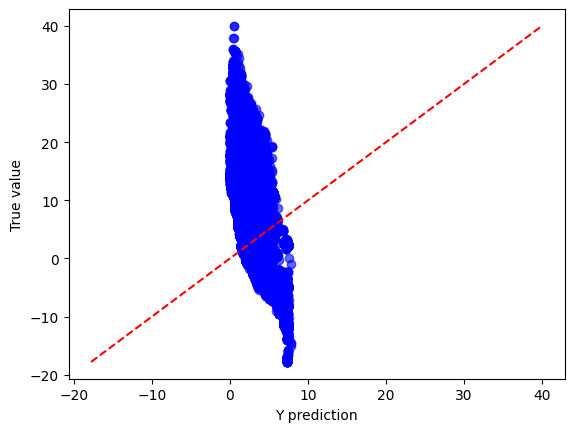

In [19]:
X_axis = trainn['distance']
Y_axis = y_pred_train
plt.scatter(X_axis, Y_axis,color='blue', alpha=0.6)
plt.xlabel('Y prediction')
plt.ylabel('True value')
plt.plot([Y_axis.min(), Y_axis.max()], [Y_axis.min(), Y_axis.max()], color='red',linestyle='--')

In [21]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
smodel = sm.OLS(y_train, X)
result = smodel.fit()
Y_hat = result.predict(X_test)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           price_per_km   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     2600.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:10:19   Log-Likelihood:            -1.7530e+06
No. Observations:              446583   AIC:                         3.506e+06
Df Residuals:                  446528   BIC:                         3.507e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [22]:
A, = y_pred.shape
Id = np.arange(A)
df = pd.DataFrame({'price': y_pred, 'ID': Id})
csv_file = '/content/drive/MyDrive/Assingment/Arun_Dilli_Submission.csv'
df.to_csv(csv_file, index=False)